<a href="https://www.kaggle.com/code/sanjilagangaju/eda-literacyrate-nepal-2011?scriptVersionId=170396884" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
print( cf.__version__)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

0.17.3
/kaggle/input/nepal-literacy-rate/province-wise.csv


In [2]:
data= pd.read_csv("/kaggle/input/nepal-literacy-rate/province-wise.csv")


In [3]:
data.head()

,Province,Sex,Population Aged 5 years & above,Population who are Can read & write,Literacy Rate
0,Province 1,Male,1960237,1553960,79.27
1,Province 1,Female,2169418,1387034,63.94
2,Province 1,Total,4129655,2940994,71.22
3,Province 2,Male,2416843,1452362,60.09
4,Province 2,Female,2393800,930760,38.88


In [4]:
data1=data.loc[data['Sex']!='Total',["Sex","Literacy Rate"]]
data1.head()

,Sex,Literacy Rate
0,Male,79.27
1,Female,63.94
3,Male,60.09
4,Female,38.88
6,Male,82.82


In [5]:
data.isnull().sum()

Province                               0
Sex                                    0
Population Aged 5 years & above        0
Population who are Can read & write    0
Literacy Rate                          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.shape

(24, 5)

In [8]:
data.columns

Index(['Province', 'Sex', 'Population Aged 5 years & above',
       'Population who are Can read & write', 'Literacy Rate'],
      dtype='object')

In [9]:
mean_literacy_rate = data.groupby('Sex')['Literacy Rate'].mean()
print("Mean Literacy Rate for Male:{:.2f}".format(mean_literacy_rate['Male']))
print("Mean Literacy Rate for Female:{:.2f}".format(mean_literacy_rate['Female']))

Mean Literacy Rate for Male:75.70
Mean Literacy Rate for Female:57.30


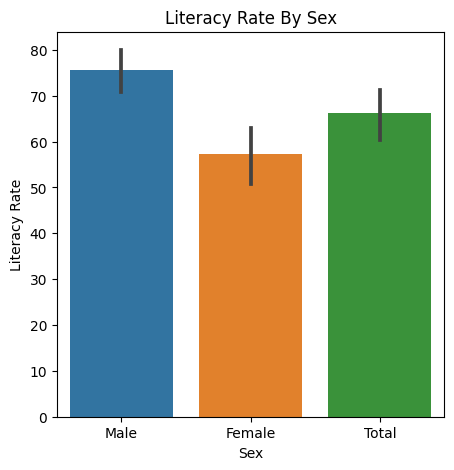

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.barplot(data=data,x='Sex',y='Literacy Rate')
plt.title("Literacy Rate By Sex")
plt.xlabel("Sex")
plt.ylabel("Literacy Rate")
plt.show()

Here from the above barplot it is evidently clear that the Male have higher literacy rate than Female on average


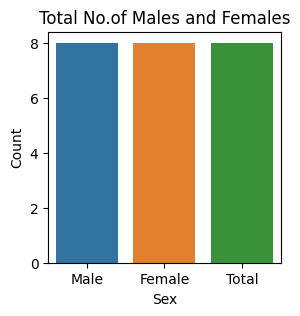

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(data=data,x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Total No.of Males and Females")
plt.show()

In [12]:
data = data.rename(columns={'Literacy Rate':'Literacy_Rate'})
data = data.rename(columns={'Population Aged 5 years & above':'Population_Aged_5_years_above'})
data = data.rename(columns={'Population who are Can read & write':'Population_who_can_read_write'})
data

,Province,Sex,Population_Aged_5_years_above,Population_who_can_read_write,Literacy_Rate
0,Province 1,Male,1960237,1553960,79.27
1,Province 1,Female,2169418,1387034,63.94
2,Province 1,Total,4129655,2940994,71.22
3,Province 2,Male,2416843,1452362,60.09
4,Province 2,Female,2393800,930760,38.88
5,Province 2,Total,4810643,2383122,49.54
6,Province 3,Male,2533555,2098279,82.82
7,Province 3,Female,2584117,1732375,67.04
8,Province 3,Total,5117672,3830654,74.85
9,Gandaki,Male,984131,822094,83.54


In [13]:
sql1 = "select Province,Population_Aged_5_years_above,Population_who_can_read_write,Literacy_Rate as Total from data where(Sex=='Total' and Province != 'Nepal')"
sql2 = "select Literacy_Rate as Male from data where(Sex=='Male' and Province != 'Nepal')"
sql3 = "select Literacy_Rate as Female from data where(Sex=='Female' and Province != 'Nepal')"

In [14]:
import pandasql
df1 = pandasql.sqldf(sql1)
df2 = pandasql.sqldf(sql2)
df3 = pandasql.sqldf(sql3)

In [15]:
df1 = df1.join(df2)
df1 = df1.join(df3)

In [16]:
df1

,Province,Population_Aged_5_years_above,Population_who_can_read_write,Total,Male,Female
0,Province 1,4129655,2940994,71.22,79.27,63.94
1,Province 2,4810643,2383122,49.54,60.09,38.88
2,Province 3,5117672,3830654,74.85,82.82,67.04
3,Gandaki,2197047,1643506,74.81,83.54,67.72
4,Province 5,4048610,2689353,66.43,75.50,58.33
5,Karnali,1367002,858126,62.77,72.88,53.21
6,Province 7,2255912,1432031,63.48,76.37,51.93


In [17]:

df1.iplot(x='Province',y=['Female','Male'], kind='bar', title='Literacy Rate in Nepal(2011)')

In [18]:
df1.iplot(x='Province',y='Total',kind='bar',title='Literacy Rate In Nepal(2011)')

In [19]:
df1.iplot(x='Province',y="Population_who_can_read_write",kind='bar',title='Literacy Rate In Nepal(2011)')

In [20]:
df1.describe().round(3)

,Population_Aged_5_years_above,Population_who_can_read_write,Total,Male,Female
count,7.000,7.000,7.000,7.000,7.000
mean,3418077.286,2253969.429,66.157,75.781,57.293
std,1459465.013,1013311.691,8.859,7.926,10.275
min,1367002.000,858126.000,49.540,60.090,38.880
25%,2226479.500,1537768.500,63.125,74.190,52.570
50%,4048610.000,2383122.000,66.430,76.370,58.330
75%,4470149.000,2815173.500,73.015,81.045,65.490
max,5117672.000,3830654.000,74.850,83.540,67.720


In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [22]:
numerical_columns = ['Population_Aged_5_years_above', 'Population_who_can_read_write']
correlation_matrix = df1[numerical_columns].corr()

#sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".3f")

plotly_fig = go.Figure(go.Heatmap(z=correlation_matrix.values,
                                   x=correlation_matrix.columns,
                                   y=correlation_matrix.columns,
                                   colorscale='Inferno'))
iplot(plotly_fig)

In [23]:
df1['proportion'] = df1['Population_who_can_read_write'] / df1['Population_Aged_5_years_above']

df1.iplot(x='Province',y="proportion",kind='bar',title='Literacy Rate In Nepal(2011)')


# Conclusions:
1.Male have more literacy rate than Females in all provinces.

2.Province 2 has the least proportion of literacy whereas Province 3 and Gandaki Province has greatest prportions.

3.Population_Aged_5_years_above and Population_who_can_read_write is close to +1, it indicates that as the population aged 5 years and above increases, the population who can read and write also tends to increase.

4.Province3 has high number of population who can read and write

5.Gandaki and Province 3 are the most literace province according to census 2011
